In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/normalized.csv')
display(df.shape)

(636427, 15)

In [2]:
all_keys = ['clientTotalTime', 'cpuUsage', 'databaseType', 'freeMem', 'frequency', 'id', 'instanceType', 'requestSize', 'serverType', 'timeDelete', 'timeRead', 'timeWrite', 'timestamp', 'totalMem', 'totalTime']

servers = sorted(['java', 'nodejs'])
databases = sorted(['nosql', 'sql'])
instances = sorted(['b1', 'b2', 'b4', 'b8'])

combinations = [(servers[0], databases[0]), (servers[1], databases[0]), (servers[0], databases[1]), (servers[1], databases[1])]

sizes = sorted(list(df['requestSize'].unique()))
frequencies = sorted(list(df['frequency'].unique()))

In [3]:
def plot_request_sizes(metric):
    fig, ax = plt.subplots()

    for instance in instances:        
        for server in servers:
            partial = df.loc[(df['instanceType'] == instance) & (df['serverType'] == server) & (df[metric] != -1)]
            unique_sizes = sorted(list(partial['requestSize'].unique()))
            
            x_vals = []
            y_vals = []
            
            for size in unique_sizes:
                partial_sizes = partial.loc[df['requestSize'] == size]
                
                if (partial_sizes.shape[0] > 0):
                    x_vals.append(size)
                    y_vals.append(partial_sizes[metric].mean())
                    
            ax.plot(x_vals, y_vals, label='{} - {}'.format(instance, server))
            
            
            
        for database in databases:
            partial = df.loc[(df['instanceType'] == instance) & (df['databaseType'] == database) & (df[metric] != -1)]
            unique_sizes = sorted(list(partial['requestSize'].unique()))
            
            x_vals = []
            y_vals = []
            
            for size in unique_sizes:
                partial_sizes = partial.loc[df['requestSize'] == size]
                
                if (partial_sizes.shape[0] > 0):
                    x_vals.append(size)
                    y_vals.append(partial_sizes[metric].mean())
                    
            ax.plot(x_vals, y_vals, label='{} - {}'.format(instance, database))

            
    ax.set_ylim(0)
    ax.set_xticks(sizes)
    ax.set_title('Payload Size analysis - {}'.format(metric))
    ax.set_xlabel('Payload Sizes (KB)')
    ax.set_ylabel('Time (ms)')
    ax.autoscale_view() 
    ax.legend()
    ax.grid(True)
    fig.set_size_inches(22, 12)
    plt.savefig('graphs/times-overall/size-based-{}.png'.format(metric), bbox_inches='tight')
    plt.show()

    
def plot_frequencies(metric):
    fig, ax = plt.subplots()

    for instance in instances:
        for server in servers:
            partial = df.loc[(df['instanceType'] == instance) & (df['serverType'] == server) & (df[metric] != -1)]
            unique_frequencies = sorted(list(partial['frequency'].unique()))
            
            x_vals = []
            y_vals = []
            
            for freq in unique_frequencies:
                partial_freqs = partial.loc[df['frequency'] == freq]
                
                if (partial_freqs.shape[0] > 0):
                    x_vals.append(freq)
                    y_vals.append(partial_freqs[metric].mean())
                    
            ax.plot(x_vals, y_vals, label='{} - {}'.format(instance, server))
            
            
            
        for database in databases:
            partial = df.loc[(df['instanceType'] == instance) & (df['databaseType'] == database) & (df[metric] != -1)]
            unique_frequencies = sorted(list(partial['frequency'].unique()))
            
            x_vals = []
            y_vals = []
            
            for freq in unique_frequencies:
                partial_freqs = partial.loc[df['frequency'] == freq]
                
                if (partial_freqs.shape[0] > 0):
                    x_vals.append(freq)
                    y_vals.append(partial_freqs[metric].mean())
                    
            ax.plot(x_vals, y_vals, label='{} - {}'.format(instance, database))
            
            
    ax.set_ylim(0)
    ax.set_xticks(frequencies)
    ax.set_title('Frequecy analysis - {}'.format(metric))
    ax.set_xlabel('Frequencies (Hz)')
    ax.set_ylabel('Time (ms)')
    ax.autoscale_view()
    ax.legend()
    ax.grid(True)
    fig.set_size_inches(22, 12)
    plt.savefig('graphs/times-overall/frequency-based-{}.png'.format(metric), bbox_inches='tight')
    plt.show()

### Payload Size Plots

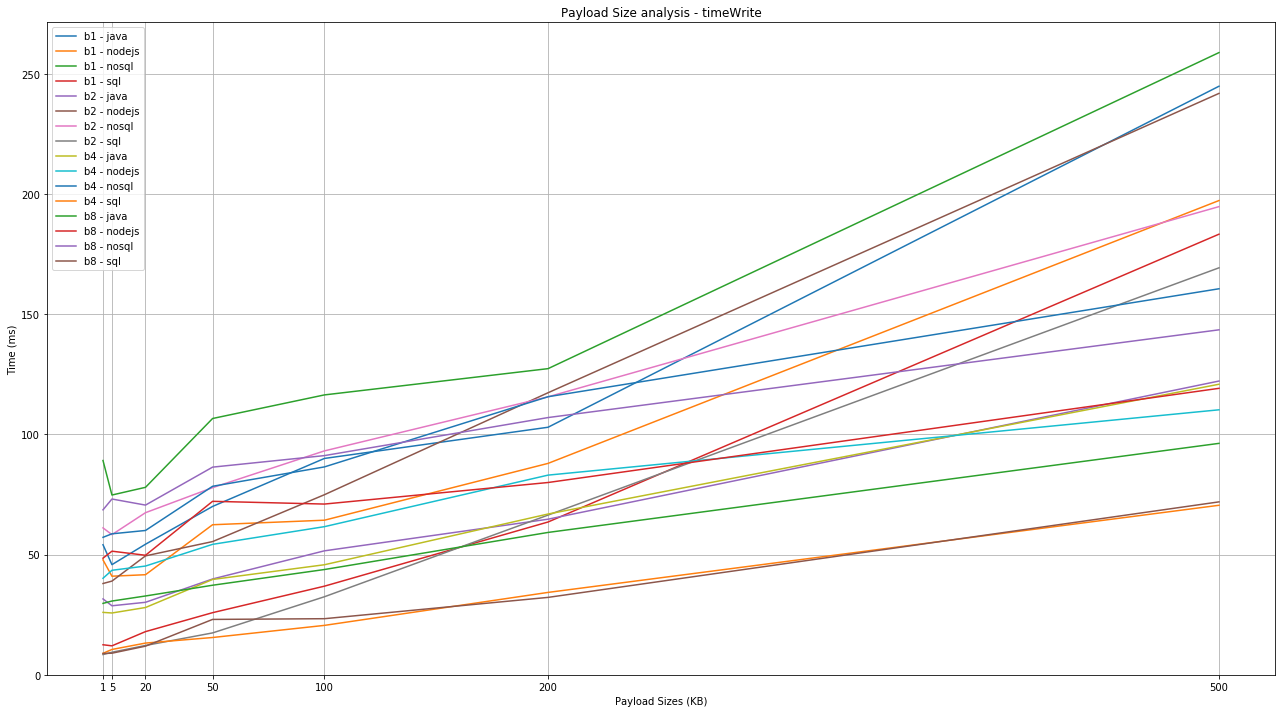

In [4]:
plot_request_sizes('timeWrite')

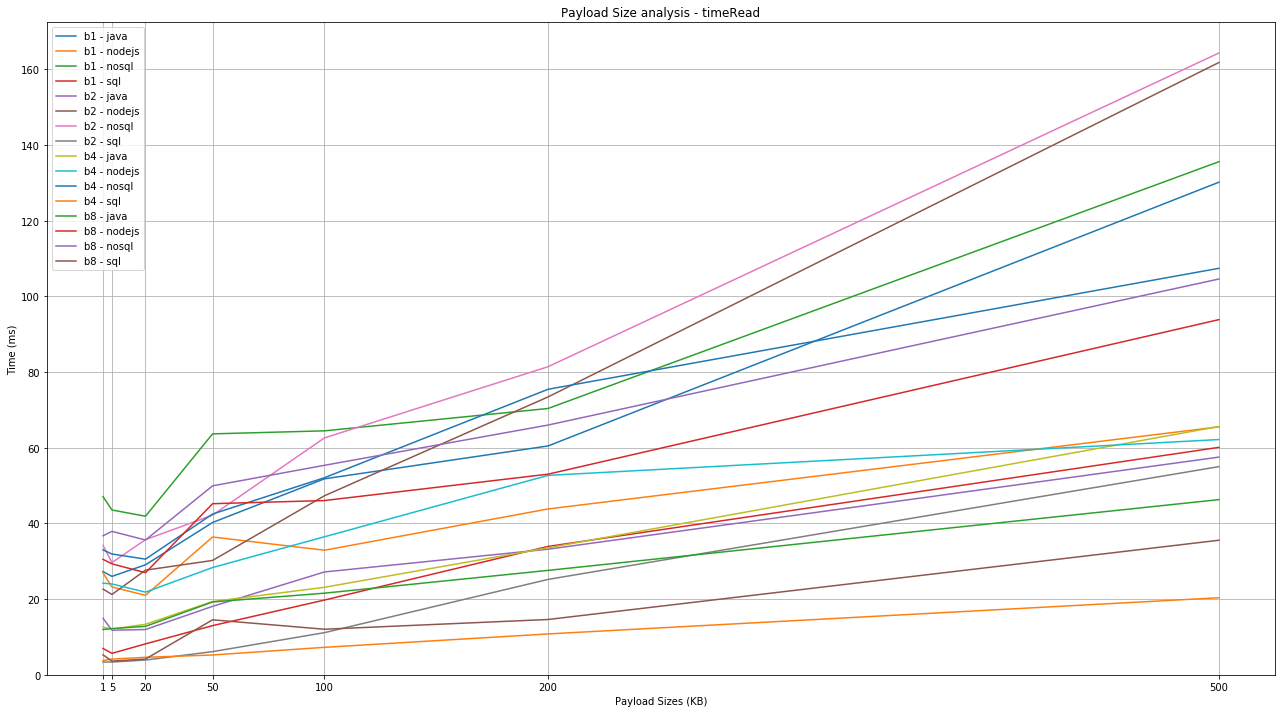

In [5]:
plot_request_sizes('timeRead')

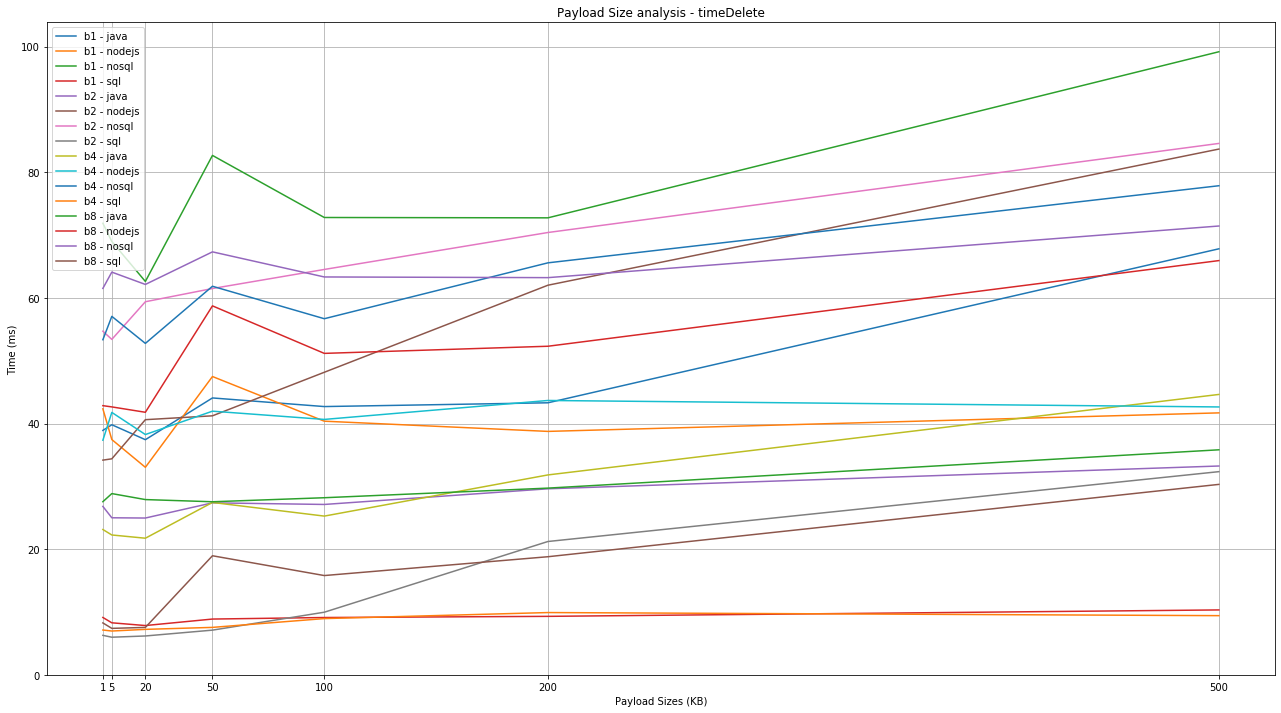

In [6]:
plot_request_sizes('timeDelete')

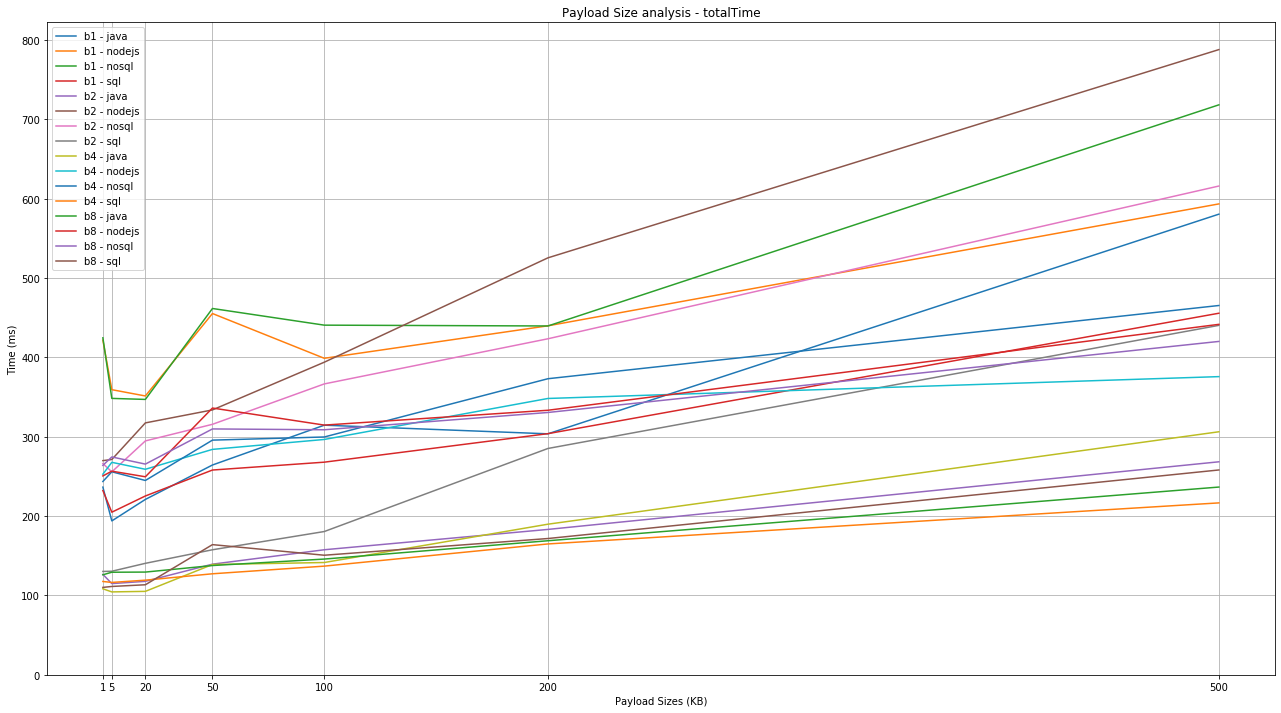

In [7]:
plot_request_sizes('totalTime')

### Frequency Plots

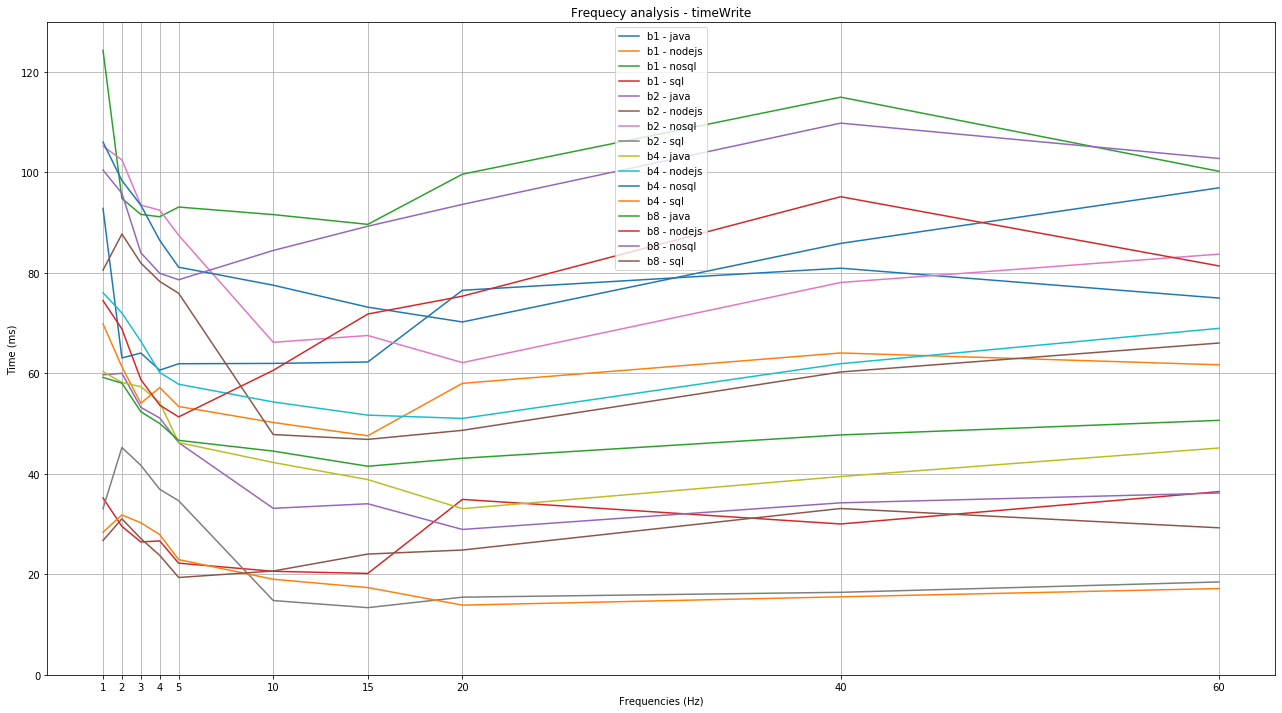

In [8]:
plot_frequencies('timeWrite')

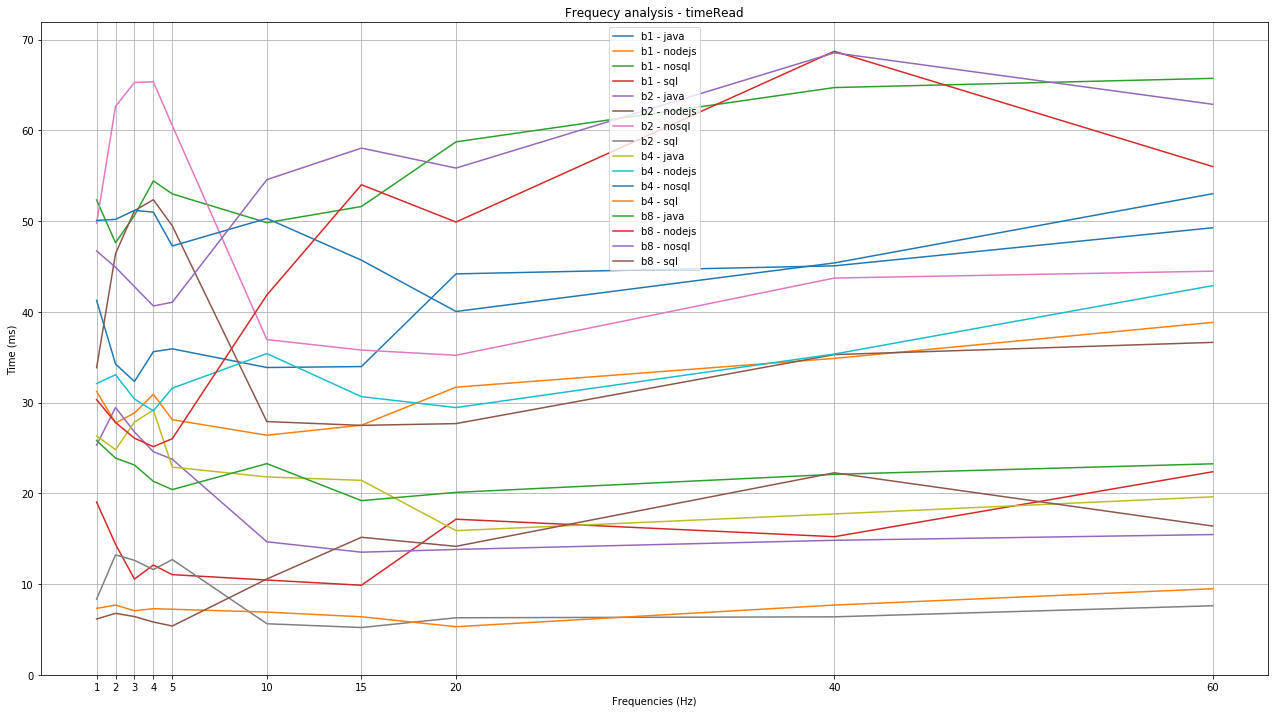

In [9]:
plot_frequencies('timeRead')

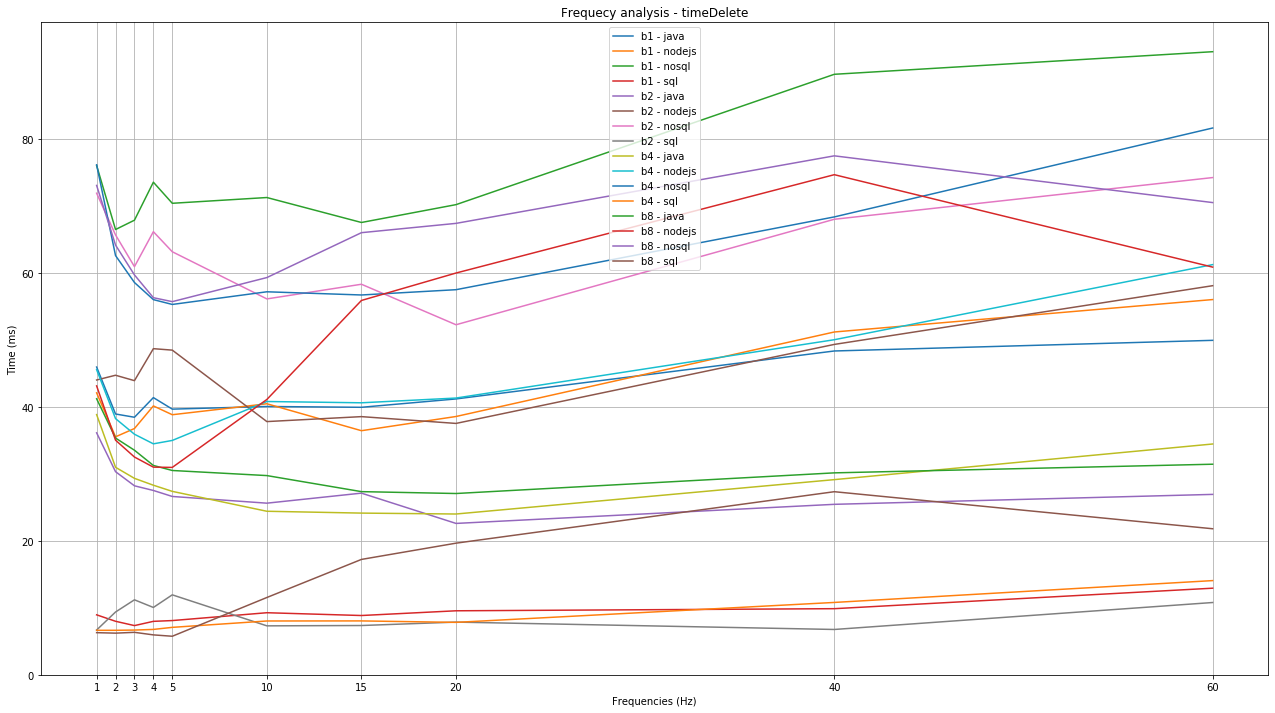

In [10]:
plot_frequencies('timeDelete')

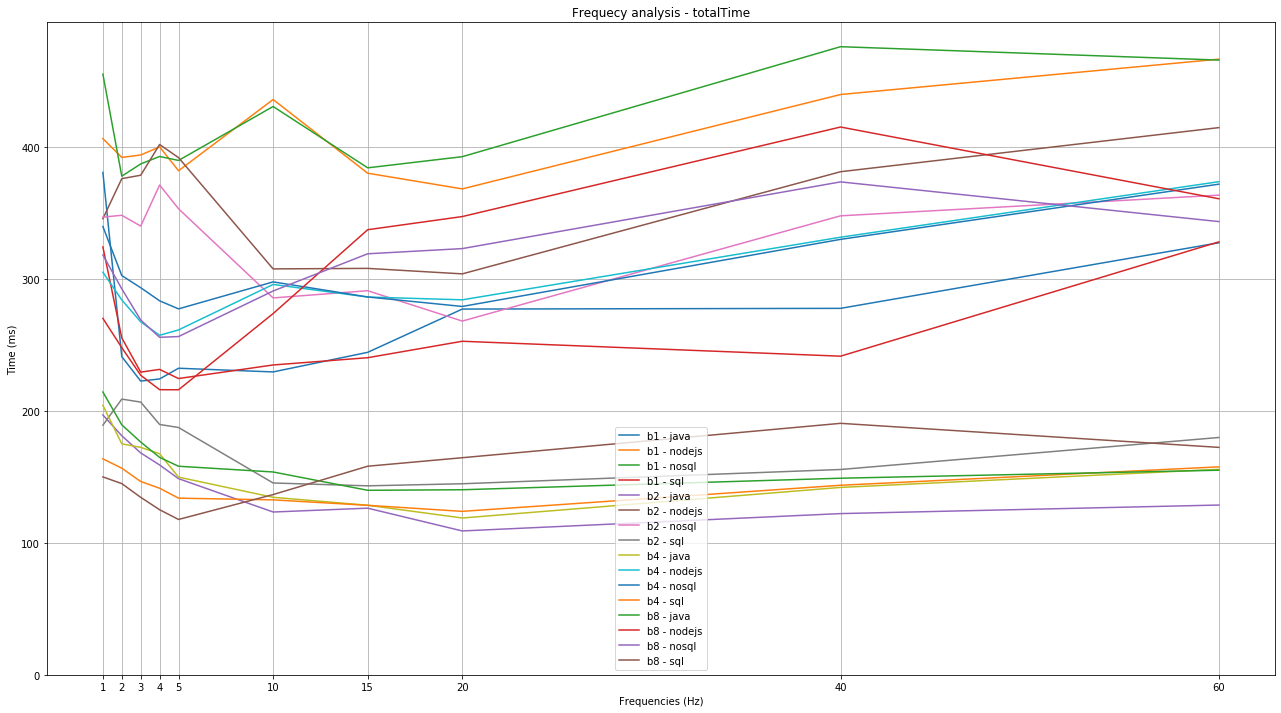

In [11]:
plot_frequencies('totalTime')